# <center>Project 1: Color compression</center>
Tên: `Lê Vũ Ngân Trúc`

MSSV: `21127709`

Lớp: `21127709`

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from io import BytesIO
import time

In [2]:
class KMeans():
  def __init__(self, k_cluster, max_iterations=10, init_centroids='random'):
    '''
      init_centroids : str
                The way which use to init centroids
                'random' --> centroid has `c` features, with `c` is initial random in [0,255]
                'in_pixels' --> centroid is a random pixels of original image
    '''
    self.k_cluster=k_cluster
    self.max_iterations = max_iterations
    self.all_centroids = []
    self.all_labels = []
    self.init_centroids = init_centroids

  # Thuật toán lấy đầu vào là một dataset, trả về tâm của k cụm
  def fit(self, dataSet):
    numFeatures = dataSet.shape[1]
    centroids =  self.get_random_centroids(self.k_cluster, numFeatures, dataSet)
    self.all_centroids.append(centroids)
    self.all_labels.append(None)

    iteration = 0
    oldCentroids = None
    while  not self.should_stop(oldCentroids, centroids, iteration):
      oldCentroids = centroids
      iteration += 1
      labels = self.get_labels(dataSet, centroids)
      self.all_labels.append(labels)
      centroids = self.get_centroids(dataSet, labels, centroids, self.k_cluster)
      self.all_centroids.append(centroids)
    return centroids

  # Khởi tạo centroids ngẫu nhiên
  def get_random_centroids(self, k_cluster, numFeatures, dataSet):
    # Trả về matrix 2D với số hàng tương ứng với k centroids và cột là features
    if self.init_centroids == 'random':
      tmp_centroids = np.random.rand(k_cluster, numFeatures)
      return np.array([[col*255 for col in row] for row in tmp_centroids])
    length=dataSet.shape[0]
    tmp_centroids = np.random.rand(k_cluster)
    return np.array([dataSet[int(row*length)] for row in tmp_centroids])

  # Trả về nhãn (label) của mỗi điểm dữ liệu
  def get_labels(self, dataSet, centroids):
    labels = []
    for x in dataSet:
      # Tính khoảng cách tới các centroids và cập nhận nhãn
      distances = np.sum((x-centroids)**2, axis=1)
      label = np.argmin(distances)
      labels.append(label)
    return labels

  # Quyết định khi nào k-Means dừng (1) vượt max_iteration (2) tâm cụm không đổi
  def should_stop(self, oldCentroids, centroids, iterations):
    if iterations > self.max_iterations:
      return True
    return np.all(np.array(oldCentroids) == np.array(centroids))

  # Trả về tọa độ mới của k tâm cụm
  def get_centroids(self, dataSet, labels, current_centroids, k_cluster):
    centroids = []
    for j in np.arange(k_cluster):
      # Lấy index cho mỗi centroids
      idx_j = np.where(np.array(labels) == j)[0]
      if len(dataSet[idx_j, :]) == 0:
        centroids.append(current_centroids[j])
      else:
        centroid_j = dataSet[idx_j, :].mean(axis=0)
        centroids.append(centroid_j)
    return centroids


In [3]:
def compressColor(k_cluster, ori_pixels, option):
  kmeans=KMeans(k_cluster = k_cluster,max_iterations = 20,init_centroids = option)
  centroids = kmeans.fit(ori_pixels)
  labels = kmeans.get_labels(ori_pixels, centroids)
  return np.array([centroids[x]//1 for x in labels])

In [17]:
def imageByteSize(img):
    img_file = BytesIO()
    image = Image.fromarray(np.uint8(img))
    image.save(img_file, 'png')
    return img_file.tell()/1024

In [5]:
def variance(dataSet):
    return sum(np.linalg.norm(dataSet - np.mean(dataSet, axis = 0), axis = 1)**2)

Dung lượng ảnh gốc: 52.5234375KB
Số lượng màu ảnh gốc: 17399
Thời gian chạy: 28.96342396736145s
Phương sai: 427408173.2510181
Dung lượng ảnh nén 3 màu: 3.345703125KB
Giảm 93.63007585899152% dung lượng


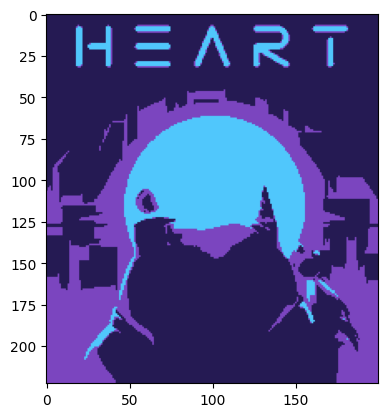

Thời gian chạy: 90.43726587295532s
Phương sai: 466932387.60607094
Dung lượng ảnh nén 5 màu: 6.0458984375KB
Giảm 88.48914175219396% dung lượng


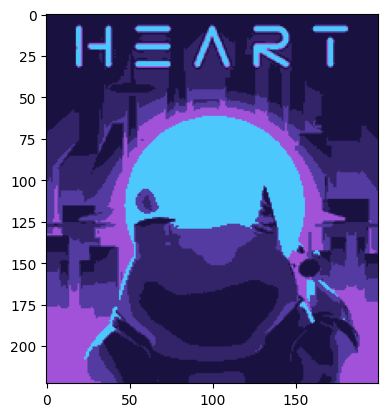

Thời gian chạy: 46.14561486244202s
Phương sai: 507199850.1797057
Dung lượng ảnh nén 7 màu: 7.728515625KB
Giảm 85.28558679161088% dung lượng


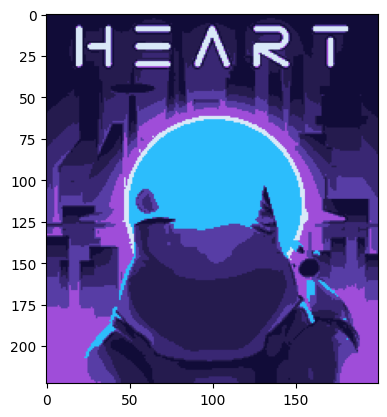

Thời gian chạy: 75.18296265602112s
Phương sai: 525524190.49553514
Dung lượng ảnh nén 20 màu: 15.1669921875KB
Giảm 71.12338241856314% dung lượng


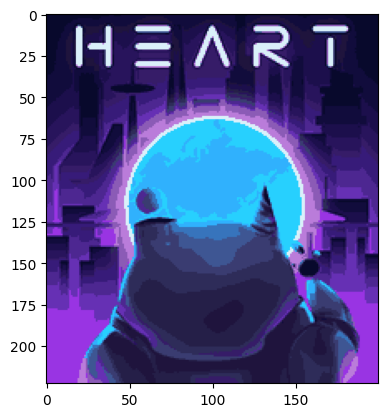

In [21]:
def main():
    # Input của chương trình
    img_link = input("Nhập đường dẫn ảnh muốn nén: ")
    # img_link = "Test4.png"
    img_name = img_link.rfind('.')
    img_name = img_link[0:img_name].split("\\")[-1]
    ori_img = Image.open(img_link).convert("RGB")
    file_type = input("Nhập loại file ảnh muốn lưu (png hoặc pdf):")

    # Convert, reshape ảnh đã đọc
    ori_pixels = np.array(ori_img.getdata())
    ori_img_dim = ori_img.size
    ori_img_size = imageByteSize(ori_img)
    ori_img_n_colors = len(set(ori_img.getdata()))
    print(f"Dung lượng ảnh gốc: {ori_img_size}KB")
    print(f"Số lượng màu ảnh gốc: {ori_img_n_colors}")
    plt.show()

    k_cluster = [3, 5, 7, 20]
    for k in k_cluster:
        start_time = time.time()
        new_pixels = compressColor(k, ori_pixels, "in_pixels")
        end_time = time.time()
        new_img = new_pixels.reshape(ori_img_dim[1], ori_img_dim[0], -1)
        print(f"Thời gian chạy: {end_time - start_time}s")
        print(f"Phương sai: {variance(new_pixels)}")
        new_img = Image.fromarray(np.uint8(new_img))
        new_img_size = imageByteSize(new_img)
        print(f"Dung lượng ảnh nén {k} màu: {new_img_size}KB")
        print(f"Giảm {100-new_img_size/ori_img_size*100}% dung lượng")
        plt.imshow(new_img)
        plt.show()
        new_img.save(f"{img_name}-{k}.{file_type}")

if __name__ == "__main__":
    main()